In [26]:
!pip install pandas scikit-learn accelerate datasets numpy matplotlib seaborn

In [27]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, f1_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
import numpy as np
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import warnings


In [28]:
warnings.filterwarnings("ignore")

In [29]:
df_test = pd.read_csv(r"C:\Users\Educational Purpose\Downloads\posts_test.csv")
df_orig = pd.read_csv(r"C:\Users\Educational Purpose\Downloads\posts_train.csv")
df_para = pd.read_csv(r"C:\Users\Educational Purpose\Downloads\posts_train_paraphrased_full.csv")

In [30]:
print(f"Loaded datasets:")
print(f" - Original (posts_train.csv): {df_orig.shape}")
print(f" - Paraphrased (posts_train_paraphrased_full.csv): {df_para.shape}")
print(f" - Test (posts_test.csv): {df_test.shape}")

Loaded datasets:
 - Original (posts_train.csv): (13728, 26)
 - Paraphrased (posts_train_paraphrased_full.csv): (13729, 27)
 - Test (posts_test.csv): (1488, 4)


In [31]:
for name, df in {"Original": df_orig, "Paraphrased": df_para, "Test": df_test}.items():
    assert "post" in df.columns and "class_name" in df.columns, f"{name} dataset missing columns."

# Drop missing rows
df_orig = df_orig.dropna(subset=["post", "class_name"]).reset_index(drop=True)
df_para = df_para.dropna(subset=["post", "class_name"]).reset_index(drop=True)
df_test = df_test.dropna(subset=["post", "class_name"]).reset_index(drop=True)


In [32]:
print(f"\nAfter cleaning:")
print(f" - Original: {df_orig.shape}")
print(f" - Paraphrased: {df_para.shape}")
print(f" - Test: {df_test.shape}")



After cleaning:
 - Original: (13727, 26)
 - Paraphrased: (13725, 27)
 - Test: (1488, 4)


In [33]:
train_df = pd.concat([df_orig, df_para], ignore_index=True)
print(f"\nCombined train dataset shape: {train_df.shape}")


Combined train dataset shape: (27452, 28)


In [34]:
vectorizer = TfidfVectorizer(max_features=5000, stop_words="english")
X_train = vectorizer.fit_transform(train_df["post"])
X_test = vectorizer.transform(df_test["post"])

le = LabelEncoder()
le.fit(train_df["class_name"])
y_train = le.transform(train_df["class_name"])
y_test = le.transform(df_test["class_name"])

In [43]:
print("\n--- Final EXPERIMENT : Random Forest (Train: Orig+Para | Test: Test) ---")
model = RandomForestClassifier(n_estimators=200, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)


--- Final EXPERIMENT : Random Forest (Train: Orig+Para | Test: Test) ---


In [44]:
acc = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average="macro")

print(f"\nFinal Accuracy: {acc:.4f} | Final F1 (macro): {f1:.4f}\n")
print("Classification Report:")
print(classification_report(y_test, y_pred, labels=np.unique(y_test)))



Final Accuracy: 0.7305 | Final F1 (macro): 0.7341

Classification Report:
              precision    recall  f1-score   support

           1       0.68      0.74      0.71       248
           2       0.76      0.70      0.73       248
           3       0.82      0.61      0.70       248
           4       0.53      0.73      0.61       248
           5       0.83      0.88      0.85       248
           6       0.90      0.73      0.80       248

    accuracy                           0.73      1488
   macro avg       0.75      0.73      0.73      1488
weighted avg       0.75      0.73      0.73      1488



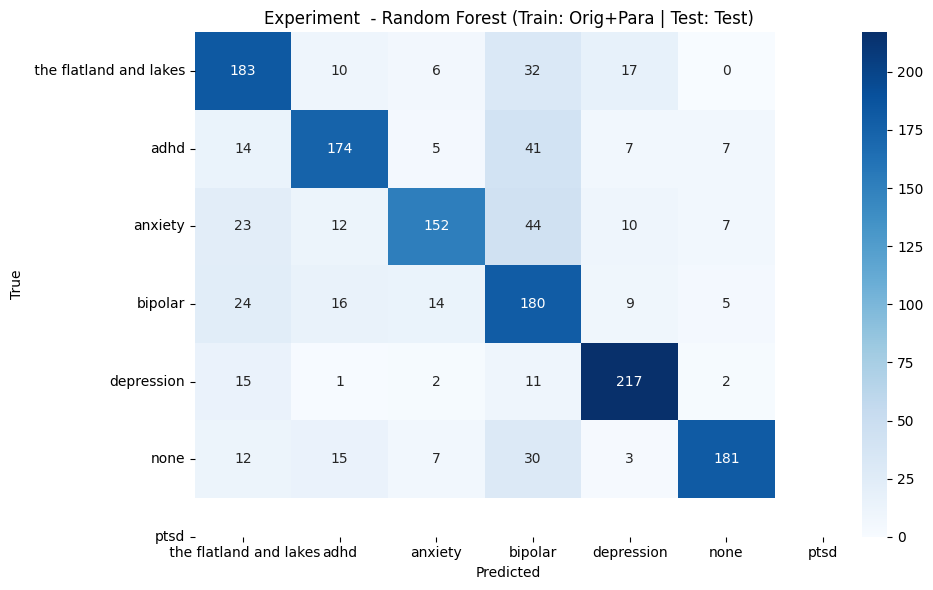

In [45]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=le.classes_, yticklabels=le.classes_)
plt.title("Experiment  - Random Forest (Train: Orig+Para | Test: Test)")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.tight_layout()
plt.show()


In [46]:
results_df = pd.DataFrame({
    "Experiment": ["Final Experiment"],
    "Model": ["Random Forest (Train: Orig+Para | Test: Test)"],
    "Accuracy": [acc],
    "F1_macro": [f1]
})

results_df.to_csv(r"C:\Users\Educational Purpose\Downloads\Finalexperiment_randomforest_results.csv", index=False)
print("\nSaved results to Finalexperiment_randomforest_results.csv")


Saved results to Finalexperiment_randomforest_results.csv
